In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'multiple_linear_regression_dataset.csv'  # Adjust to your file location
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
# Check dataset info
data.info()

# Check for null values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop duplicate rows if any
data.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes

Missing Values:
age           0
experience    0
income        0
dtype: int64


In [ ]:
# Impute missing numerical values with the median
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Impute missing categorical values with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if all missing values are treated
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
age           0
experience    0
income        0
dtype: int64


In [ ]:
# Define features (independent variables) and target (dependent variable)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 753796.7693734544
R-squared: 0.9387098237077887


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Squared Error (MSE): 753796.77
Root Mean Squared Error (RMSE): 868.21
R-squared Score (R²): 0.9387


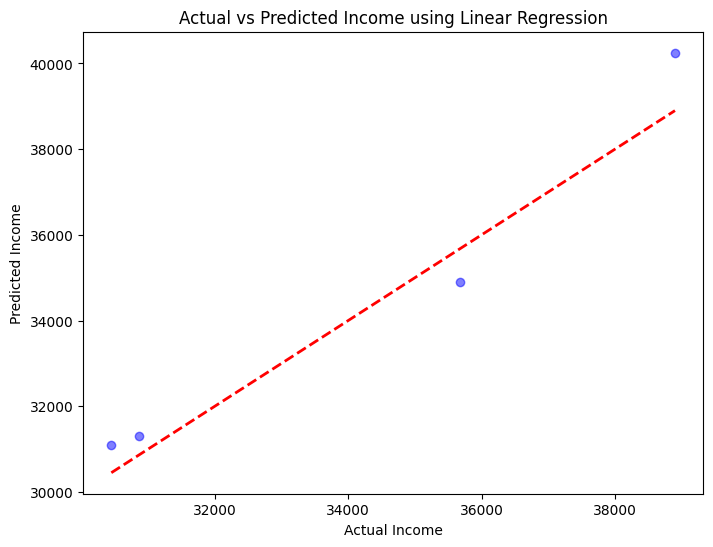

In [ ]:
# Visualizing Actual vs Predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income using Linear Regression")
plt.show()
